<a id='home'></a>

# Analysis on Movies data

#### Table of Contents
- <a href="#introduction">Introduction</a>
- <a href="#questions">Questions</a>
- <a href="#packages">Import Packages</a>
- <a href="#wrangling">Data Wrangling</a>
    - <a href="#read">Read data</a>
    - <a href="#dataSummary">Concise summary of the movie DataFrame</a>
    - <a href="#dataCleaning">Data Cleaning</a>
- <a href="#exploratory">Exploratory Data Analysis</a> 
    - <a href="#maths">Some statistical summary of movie data</a>
    - <a href="#visualization">Visualizations of the statistical result</a>
        - <a href="#barchart">Using barchart</a>
        - <a href="#seaborn">Using Seaborn with regression line</a>
- <a href="#solutions">Solution for Questions</a>
    - <a href='#firstQuestion'>How has the average movie runtime changed over the years, and is there a trend?</a>
    - <a href="#secondQuestion">Which genres are most popular from year to year?</a>
    - <a href="#thridQuestion">Visualize the relationship between movie budgets and revenues across different genres and illustrate how budgets and revenues vary within each genre?</a>
    - <a href="#fourthQuestion">What kinds of properties are associated with movies that have high revenues?</a>
    - <a href="#fifthQuestion">What genre will be popular in the future years?</a>
- <a href="#conclusion">Conclusions</a>

<a id='introduction'></a>

### Introduction
This analysis includes cleaning data, explanation about the data and answering questions listed at question part.

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. 
- Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characterl.
- There are some odd characters in the ‘cast’ column.

We need to answer the bellow questions;

<a id='question'></a>

#### Questions

1. <a href='#firstQuestion'>How has the average movie runtime changed over the years, and is there a trend?</a>
2. <a href="#secondQuestion">Which genres are most popular from year to year?</a>
3. <a href="#thridQuestion">Visualize the relationship between movie budgets and revenues across different genres and illustrate how budgets and revenues vary within each genre?</a>
4. <a href="#fourthQuestion">What kinds of properties are associated with movies that have high revenues?</a>
5. <a href="#fifthQuestion">What genre will be popular in the future years?</a>

<a id='packages'></a>

### Import Packages

In [37]:
# It's a fundamental tool for data preprocessing and exploration.
import pandas as pd 

# It provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these elements.
# Efficient numerical operations are crucial for data manipulation and scientific computing. 
import numpy as np

# It provides a wide variety of plots and charts to visualize data and is often used for creating static, interactive, and animated plots. 
import matplotlib.pyplot as plt
 
# It is a data visualization library based on Matplotlib, offering additional features and a high-level interface for creating attractive and informative statistical graphics.
import seaborn as sns
 
# It provides functionalities for creating and training machine learning models, including tools for evaluating model performance and selecting hyperparameters.
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# It is used for encoding categorical variables into numerical values, an essential step in preparing data for machine learning models.
from sklearn.preprocessing import LabelEncoder


<a id="wrangling"></a>

### Data Wrangling

<a id='read'></a>

##### Read data

In [38]:
# read movie data from dataset directory and display sample data
movie_data = pd.read_csv("dataset/tmdb_movies.csv")
print(movie_data.head())

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

<a id='dataSummary'></a>

##### Concise summary of the movie DataFrame

In [39]:
''' 
    Let us see informations such as data types, 
    non-null counts, and memory usage of the movie data.
'''
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

<a id='dataCleaning'></a>

##### Data Cleaning 

In [40]:
# Let us see if there is missing datas

for col in movie_data.columns:
    pct_missing = np.mean(movie_data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0%
imdb_id - 0%
popularity - 0%
budget - 0%
revenue - 0%
original_title - 0%
cast - 1%
homepage - 73%
director - 0%
tagline - 26%
keywords - 14%
overview - 0%
runtime - 0%
genres - 0%
production_companies - 9%
release_date - 0%
vote_count - 0%
vote_average - 0%
release_year - 0%
budget_adj - 0%
revenue_adj - 0%


In [41]:
#  If the missing values are few and scattered, you may choose to drop the rows with missing values.
# remove null values from dataset
movie_data.dropna(inplace=True)

#  If a column has a high percentage of missing values and is not crucial for your analysis, we might consider dropping the entire column.
movie_data.drop('homepage', axis=1, inplace=True)

# We may can create a binary indicator column that marks whether a value was missing in the original column.
movie_data['cast'].fillna(movie_data['cast'].mode()[0], inplace=True)

# We create a binary indicator column that marks whether a value was missing in the original column.
movie_data['tagline_missing'] = movie_data['tagline'].isnull().astype(int)

# For columns like 'tagline', 'keywords', and 'overview', we might replace missing values with a placeholder like "Not available" or an empty string.
movie_data['tagline'].fillna('Not available', inplace=True)

#  For time-series data, we can use interpolation methods to estimate missing values based on existing data points. 
movie_data['revenue'].interpolate(inplace=True)

# drop similar rows
movie_data.drop_duplicates()

# drop rows which has similar movie id
movie_data.drop_duplicates(subset='id')

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,tagline_missing
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,0
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,0
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,0
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,0
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10724,668,tt0064757,1.778746,7000000,81974493,On Her Majesty's Secret Service,George Lazenby|Diana Rigg|Telly Savalas|Gabrie...,Peter R. Hunt,Far up! Far out! Far more! James Bond 007 is b...,london|suicide|england|switzerland|secret iden...,...,142,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,12/12/69,258,6.4,1969,4.160985e+07,4.872780e+08,0
10759,948,tt0077651,1.198849,300000,70000000,Halloween,Donald Pleasence|Jamie Lee Curtis|P.J. Soles|N...,John Carpenter,The Night HE Came Home!,female nudity|nudity|mask|babysitter|halloween,...,91,Horror|Thriller,Compass International Pictures|Falcon Internat...,10/25/78,522,7.3,1978,1.002810e+06,2.339890e+08,0
10760,8469,tt0077975,1.157930,2700000,141000000,Animal House,John Belushi|Tim Matheson|John Vernon|Verna Bl...,John Landis,It was the Deltas against the rules... the rul...,female nudity|sex|nudity|collage|fraternity,...,109,Comedy,Universal Pictures|Oregon Film Factory|Stage I...,7/27/78,230,6.7,1978,9.025292e+06,4.713208e+08,0
10817,13963,tt0077838,0.064029,0,321952,The Last Waltz,Robbie Robertson|Rick Danko|Levon Helm|Richard...,Martin Scorsese,It Started as a Concert. It Became a Celebration.,1970s|music,...,117,Documentary|Music,FM Productions|Last Waltz Inc.,5/1/78,33,8.0,1978,0.000000e+00,1.076189e+06,0


In [42]:
''' 
   I think the data haven cleanned. So, let us 
   confirm; there is no uncleared or missing datas
'''
for col in movie_data.columns:
    pct_missing = np.mean(movie_data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0%
imdb_id - 0%
popularity - 0%
budget - 0%
revenue - 0%
original_title - 0%
cast - 0%
director - 0%
tagline - 0%
keywords - 0%
overview - 0%
runtime - 0%
genres - 0%
production_companies - 0%
release_date - 0%
vote_count - 0%
vote_average - 0%
release_year - 0%
budget_adj - 0%
revenue_adj - 0%
tagline_missing - 0%


<a id="exploratory"></a>

### Exploratory Data Analysis

<a id="maths"></a>

##### Some statistical summary of movie data

In [43]:
# let us slice data which can be mathematicaly interprated with their original title of the movie.
math_interpreted_data = movie_data[['id', 'original_title', 'budget', 'revenue']]
math_interpreted_data

,id,original_title,budget,revenue
0,135397,Jurassic World,150000000,1513528810
1,76341,Mad Max: Fury Road,150000000,378436354
2,262500,Insurgent,110000000,295238201
3,140607,Star Wars: The Force Awakens,200000000,2068178225
4,168259,Furious 7,190000000,1506249360
...,...,...,...,...
10724,668,On Her Majesty's Secret Service,7000000,81974493
10759,948,Halloween,300000,70000000
10760,8469,Animal House,2700000,141000000
10817,13963,The Last Waltz,0,321952


In [44]:
# Identify numeric columns
numeric_columns = math_interpreted_data.select_dtypes(include=[np.number]).columns

# Summary statistics for numeric columns
summary_stats = {
    'Mean': np.mean(math_interpreted_data[numeric_columns], axis=0),
    'Median': np.median(math_interpreted_data[numeric_columns], axis=0),
    'Standard Deviation': np.std(math_interpreted_data[numeric_columns], axis=0),
}

# Print the summary statistics
for stat, values in summary_stats.items():
    # Print the name of the statistic
    print(f"{stat}:")

    # Print the calculated values
    print(values)

    # Add a line break for better readability
    print("\n")
     
# Get NumPy arrays for 'budget', 'revenue', and 'original_title'
budget_values = math_interpreted_data['budget'].to_numpy()
revenue_values = math_interpreted_data['revenue'].to_numpy()
original_titles = math_interpreted_data['original_title'].to_numpy()

# Find the indices of minimum and maximum values in 'budget' and 'revenue'
min_budget_index = np.argmin(budget_values)
max_budget_index = np.argmax(budget_values)
min_revenue_index = np.argmin(revenue_values)
max_revenue_index = np.argmax(revenue_values)

# Get the original_titles and values for minimum and maximum 'budget' and 'revenue'
original_title_min_budget = original_titles[min_budget_index]
original_title_max_budget = original_titles[max_budget_index]
original_value_min_budget = budget_values[min_budget_index]
original_value_max_budget = budget_values[max_budget_index]

original_title_min_revenue = original_titles[min_revenue_index]
original_title_max_revenue = original_titles[max_revenue_index]
original_value_min_revenue = revenue_values[min_revenue_index]
original_value_max_revenue = revenue_values[max_revenue_index]

# Print the results
print(f"Minimum budget: {original_title_min_budget} ({original_value_min_budget})")
print(f"Maximum budget: {original_title_max_budget} ({original_value_max_budget})")
print(f"Minimum revenue: {original_title_min_revenue} ({original_value_min_revenue})")
print(f"Maximum revenue: {original_title_max_revenue} ({original_value_max_revenue})")

Mean:
id         7.165215e+04
budget     3.454924e+07
revenue    1.152153e+08
dtype: float64


Median:
[   35112.5 15000000.  25787815.5]


Standard Deviation:
id         9.233270e+04
budget     5.060607e+07
revenue    2.202334e+08
dtype: float64


Minimum budget: Mr. Holmes (0)
Maximum budget: The Warrior's Way (425000000)
Minimum revenue: Survivor (0)
Maximum revenue: Avatar (2781505847)


<a id='visualization'></a>

##### Visualizations of the statistical result

<a id='barchart'></a>
Using barchart

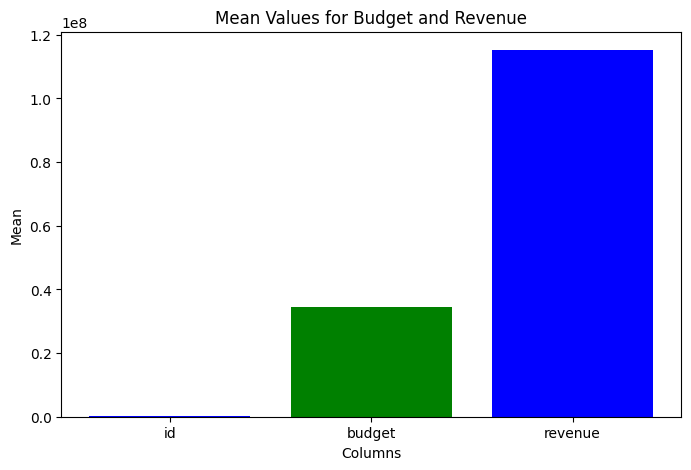

In [45]:
# Get the Mean values
mean_values = np.mean(math_interpreted_data[numeric_columns], axis=0)

# Plotting Mean values
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(mean_values.index, mean_values, color=['blue', 'green'])

ax.set_title('Mean Values for Budget and Revenue')
ax.set_xlabel('Columns')
ax.set_ylabel('Mean')
plt.show()


<a id='seaborn'></a>
Using Seaborn with regression line

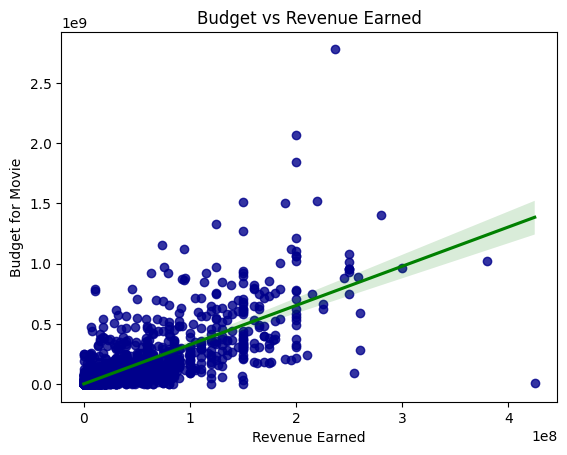

In [55]:
# Plotting budget vs revenue with a regression line
sns.regplot(x="budget", y="revenue", data=movie_data, scatter_kws={"color": "darkBlue"}, line_kws={"color": "green"})

plt.title('Budget vs Revenue Earned')
plt.xlabel('Revenue Earned')
plt.ylabel('Budget for Movie')

# Show the plot
plt.show()

<a id='solutions'></a>

## Solution for Questions

<a id='firstQuestion'></a>

### 1. How has the average movie runtime changed over the years, and is there a trend?

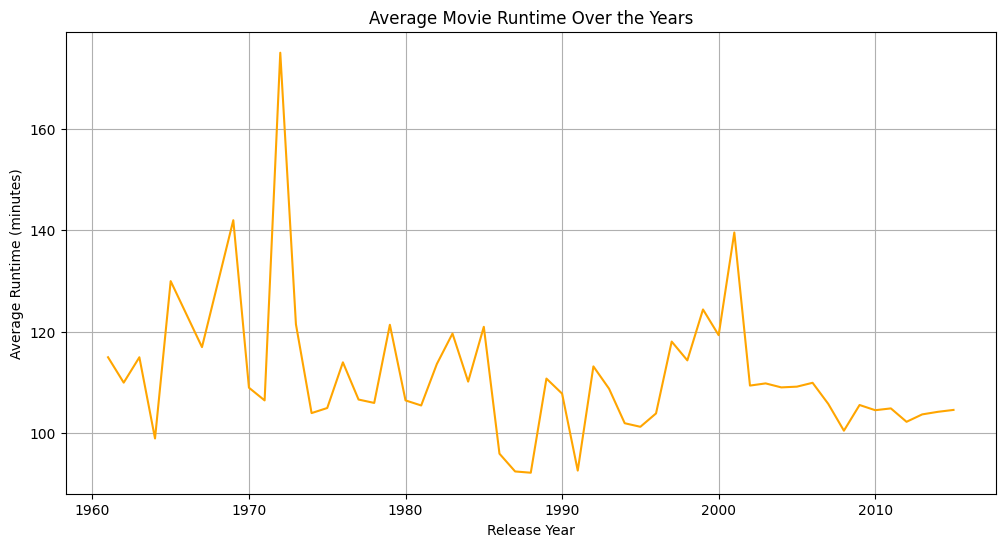

In [56]:
# Analyzing the average movie runtime over the years
average_runtime_per_year = movie_data.groupby('release_year')['runtime'].mean().reset_index()

# Plotting the trend of average movie runtime over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_runtime_per_year, x='release_year', y='runtime', color='orange')
plt.title('Average Movie Runtime Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Runtime (minutes)')
plt.grid(True)
plt.show()


<a id='secondQuestion'></a>

### 2. Which genres are most popular from year to year? 

In [67]:
# Extract genres information and create a new DataFrame
genres_data = movie_data[['release_year', 'genres', 'popularity',]]
genres_data

,release_year,genres,popularity
0,2015,Action|Adventure|Science Fiction|Thriller,32.985763
1,2015,Action|Adventure|Science Fiction|Thriller,28.419936
2,2015,Adventure|Science Fiction|Thriller,13.112507
3,2015,Action|Adventure|Science Fiction|Fantasy,11.173104
4,2015,Action|Crime|Thriller,9.335014
...,...,...,...
10724,1969,Adventure|Action|Thriller,1.778746
10759,1978,Horror|Thriller,1.198849
10760,1978,Comedy,1.157930
10817,1978,Documentary|Music,0.064029


In [49]:
# Split genres into individual rows
genres_data = genres_data.assign(genre=genres_data['genres'].str.split('|')).explode('genre')
genres_data

,release_year,genres,popularity,genre
0,2015,Action|Adventure|Science Fiction|Thriller,32.985763,Action
0,2015,Action|Adventure|Science Fiction|Thriller,32.985763,Adventure
0,2015,Action|Adventure|Science Fiction|Thriller,32.985763,Science Fiction
0,2015,Action|Adventure|Science Fiction|Thriller,32.985763,Thriller
1,2015,Action|Adventure|Science Fiction|Thriller,28.419936,Action
...,...,...,...,...
10760,1978,Comedy,1.157930,Comedy
10817,1978,Documentary|Music,0.064029,Documentary
10817,1978,Documentary|Music,0.064029,Music
10819,1978,Action|Comedy,0.044675,Action


In [50]:
# Group by release year, genre, and filter out non-numeric popularity values
popular_genres_per_year = genres_data.groupby(['release_year', 'genre'])['popularity'].apply(lambda x: pd.to_numeric(x, errors='coerce').mean()).reset_index()

# Find the most popular genre for each year
most_popular_genres = popular_genres_per_year.loc[popular_genres_per_year.groupby('release_year')['popularity'].idxmax()]

# Display the most popular genres from year to year
print("Most Popular Genres from Year to Year:")
print(most_popular_genres)


Most Popular Genres from Year to Year:
     release_year            genre  popularity
0            1961           Comedy    0.303783
2            1962           Action    3.170651
5            1963           Action    2.508235
8            1964           Action    3.153791
13           1965           Action    1.910465
16           1967           Action    1.554808
19           1969           Action    1.778746
22           1970           Comedy    0.374514
26           1971        Adventure    1.755117
32           1972            Crime    5.738034
36           1973            Drama    2.010733
39           1974           Action    1.619555
50           1975         Thriller    2.563191
51           1976           Action    0.374631
59           1977  Science Fiction   12.037933
64           1978           Horror    1.198849
67           1979           Action    3.313520
74           1980           Action    5.488441
78           1981           Action    2.451119
88           1982    

##### Visualizations Which shows most popular generes from year to year?

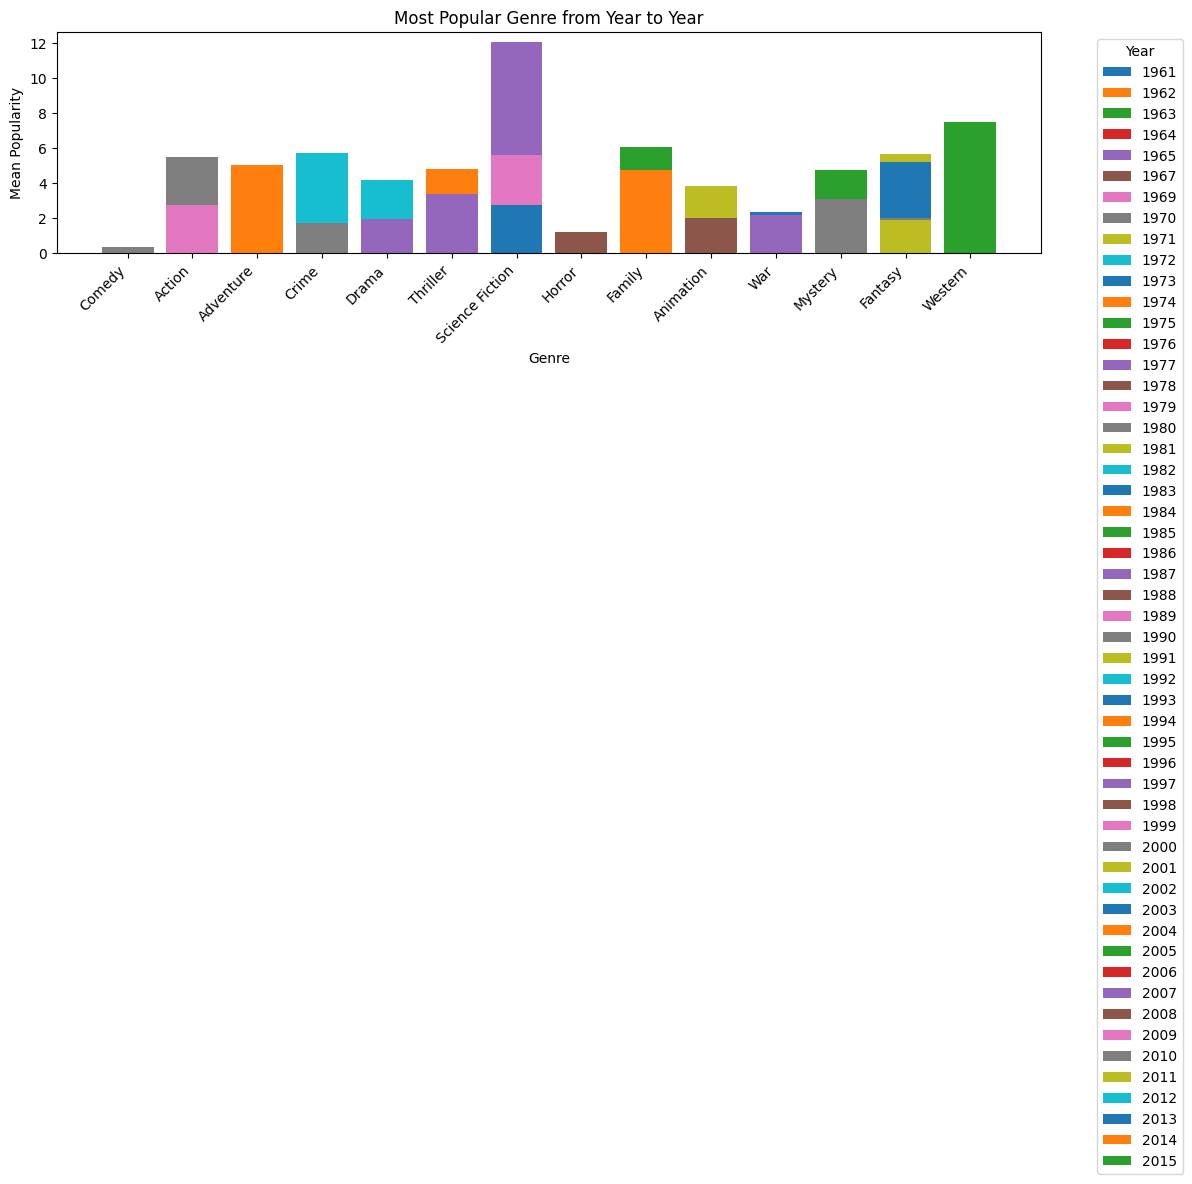

In [51]:
# Plotting
plt.figure(figsize=(12, 8))
for year, group in most_popular_genres.groupby('release_year'):
    plt.bar(group['genre'], group['popularity'], label=str(year))

# Adding labels and title
plt.xlabel('Genre')
plt.ylabel('Mean Popularity')
plt.title('Most Popular Genre from Year to Year')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


<a id="thridQuestion"></a>

### 3. Visualize the relationship between budgets and revenues across different genres and illustrate how budgets and revenues vary within each genre?

In [ ]:
# Extract genres information and create a new DataFrame
genres_revenue_rship = movie_data[['budget_adj', 'revenue_adj', 'genres']]
genres_revenue_rship.head()

,budget_adj,revenue_adj,genres
0,1.379999e+08,1.392446e+09,Action|Adventure|Science Fiction|Thriller
1,1.379999e+08,3.481613e+08,Action|Adventure|Science Fiction|Thriller
2,1.012000e+08,2.716190e+08,Adventure|Science Fiction|Thriller
3,1.839999e+08,1.902723e+09,Action|Adventure|Science Fiction|Fantasy
4,1.747999e+08,1.385749e+09,Action|Crime|Thriller


In [70]:
# Split genres into individual rows
genres_revenue_rship = genres_revenue_rship.assign(genre=genres_revenue_rship['genres'].str.split('|')).explode('genre')
genres_revenue_rship.head()

,budget_adj,revenue_adj,genres,genre
0,1.379999e+08,1.392446e+09,Action|Adventure|Science Fiction|Thriller,Action
0,1.379999e+08,1.392446e+09,Action|Adventure|Science Fiction|Thriller,Adventure
0,1.379999e+08,1.392446e+09,Action|Adventure|Science Fiction|Thriller,Science Fiction
0,1.379999e+08,1.392446e+09,Action|Adventure|Science Fiction|Thriller,Thriller
1,1.379999e+08,3.481613e+08,Action|Adventure|Science Fiction|Thriller,Action


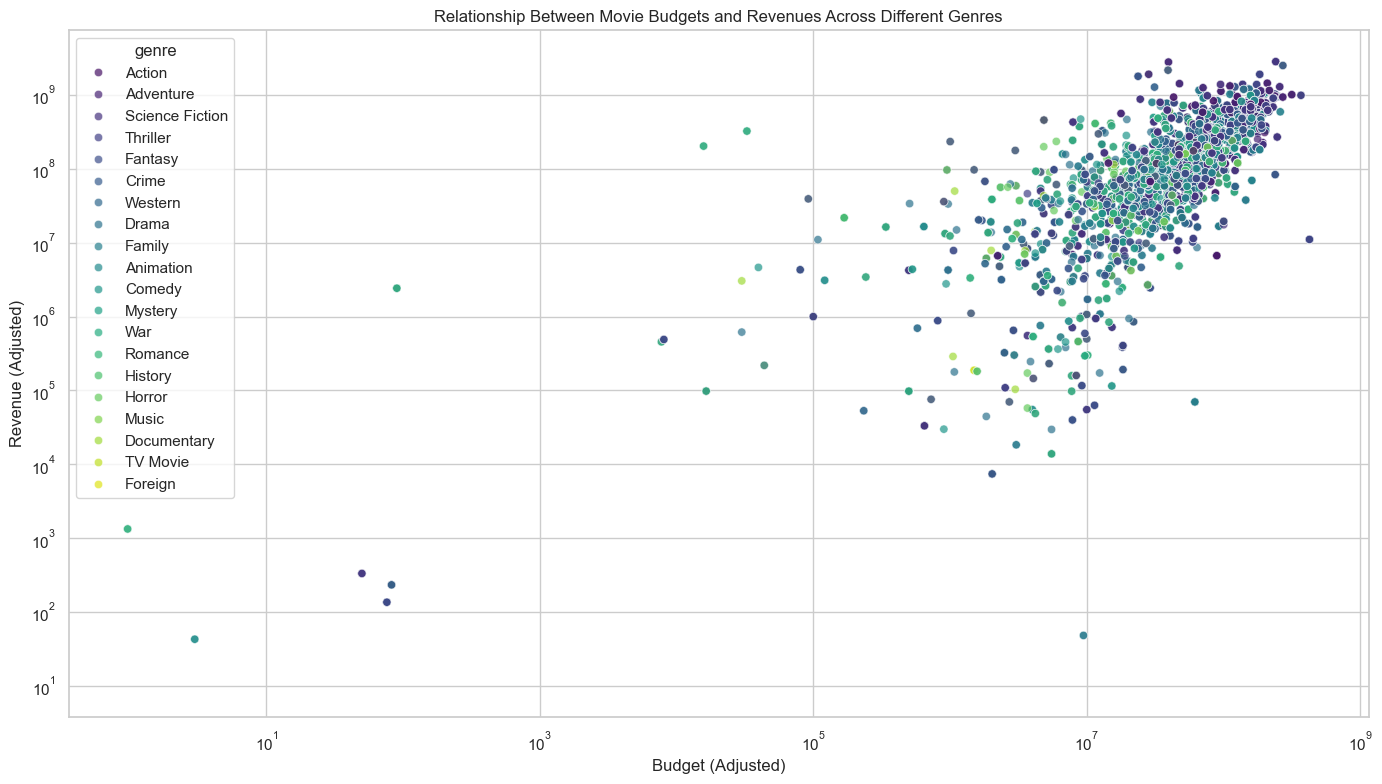

In [71]:
# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create a scatter plot to analyze the relationship between budgets and revenues across genres
plt.figure(figsize=(14, 8))
sns.scatterplot(x='budget_adj', y='revenue_adj', hue='genre', data=genres_revenue_rship, palette='viridis', alpha=0.7)
plt.title('Relationship Between Movie Budgets and Revenues Across Different Genres')
plt.xlabel('Budget (Adjusted)')
plt.ylabel('Revenue (Adjusted)')
plt.xscale('log')  # Use log scale for better visualization if budgets vary widely
plt.yscale('log')  # Use log scale for better visualization if revenues vary widely

# Show the plot
plt.tight_layout()
plt.show()


<a id='fourthQuestion'></a>
### 4. What kinds of properties are associated with movies that have high revenues?

In [52]:
# Explore the association between revenue and other properties
properties_associated_with_high_revenues = movie_data[['budget', 'popularity', 'runtime', 'vote_average', 'revenue', 'release_year']]

# Check for correlation
correlation_matrix = properties_associated_with_high_revenues.corr()

# Display correlation matrix for properties associated with high revenues
print("\nCorrelation Matrix for Properties Associated with High Revenues:")
print(correlation_matrix)

'''
    As we can see from the bellow correlation matricx budget and popularity is highly 
    associated with th revenue; wich is 0.747273 and 0.641346 respectively.
'''


Correlation Matrix for Properties Associated with High Revenues:
                budget  popularity   runtime  vote_average   revenue  \
budget        1.000000    0.513553  0.269480      0.118651  0.747273   
popularity    0.513553    1.000000  0.220787      0.298066  0.641346   
runtime       0.269480    0.220787  1.000000      0.243699  0.257756   
vote_average  0.118651    0.298066  0.243699      1.000000  0.258208   
revenue       0.747273    0.641346  0.257756      0.258208  1.000000   
release_year  0.068611    0.002262 -0.078525     -0.152250 -0.031835   

              release_year  
budget            0.068611  
popularity        0.002262  
runtime          -0.078525  
vote_average     -0.152250  
revenue          -0.031835  
release_year      1.000000  


'\n    As we can see from the bellow correlation matricx budget and popularity is highly \n    associated with th revenue; wich is 0.747273 and 0.641346 respectively.\n'

##### Visualizations Which shows correlations of the relevant columns

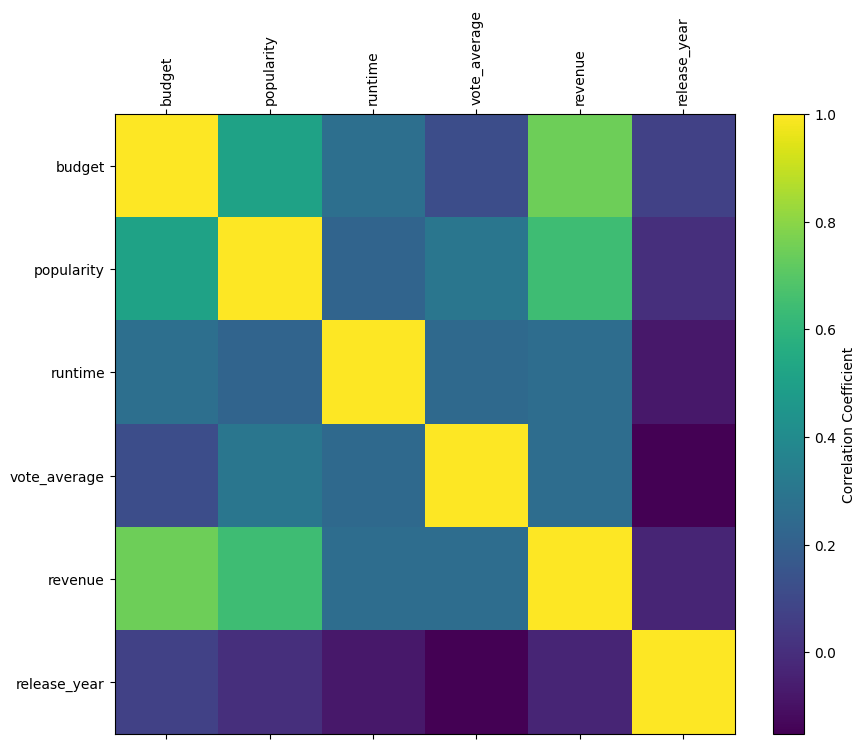

In [53]:
# Compute the correlation matrix
correlation_matrix = properties_associated_with_high_revenues.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='viridis', fignum=1)

# Add color bar legend
plt.colorbar(label='Correlation Coefficient')

# Set x and y-axis labels
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

# Show the plot
plt.show()


<a id='fifthQuestion'></a>

### 5. What genre will be popular in the future years?

In [54]:
X = genres_data[['release_year']]
y = genres_data['genre']

# Convert genre labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create and train the Random Forest Classifier
model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
model.fit(X_train, y_train)

# Let us evaluate the model on the test set
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

# Cross-validation
cv_accuracy = cross_val_score(model, X, y_encoded, cv=5, scoring='accuracy')
print(f'Cross-validated Accuracy: {cv_accuracy.mean()}')

# Now we can use the trained model for predicting genres in the coming years
X_future = pd.DataFrame({'release_year': range(2022, 2030)})
predicted_genres = label_encoder.inverse_transform(model.predict(X_future))

# Display the genres with their respective years
predicted_df = pd.DataFrame({'release_year': range(2022, 2030), 'predicted_genre': predicted_genres})
print(predicted_df)


Accuracy: 0.16
Cross-validated Accuracy: 0.05055449695121952
   release_year predicted_genre
0          2022           Drama
1          2023           Drama
2          2024           Drama
3          2025           Drama
4          2026           Drama
5          2027           Drama
6          2028           Drama
7          2029           Drama


<a id='conclusion'></a>

## Conclusions

I traversed through data wrangling and exploratory data analysis in the given movie data and I take research to answer asked questions about movie genres, elements driving high revenues, and future projections regarding genre popularity. 
I used Bar charts, scatter, regration line, and correlation matrix to visuallize datas respectively.

Bar charts were used to visually represent the most popular genres for each year, revealing the changing tastes of moviegoers throughout time. To show the links between budget, popularity, runtime, and vote average in relation to income, scatter plots were used. And I used correlation matrix plot of the matplotlib to visualize properties Associated with High Revenues.
 
From this analiysis I found arrays of most popular genres from year to year and strong positive correlations between budget, popularity, and revenue were found by conducting more research on assets associated with large revenues. Finally have answered the research questions I raised above.

<a href='#home'>Back to home</a>